Import necessary libraries

In [101]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [121]:
Image_Size=256
batch_size=32
Epoch=30
channel=3

Load data

## Load and preprocess images 

https://www.tensorflow.org/tutorials/load_data/images

In [103]:
data_set=tf.keras.utils.image_dataset_from_directory(
  "PlantVillage",
  image_size=(Image_Size, Image_Size),
  batch_size=batch_size
  )

Found 2152 files belonging to 3 classes.


In [104]:
class_names=data_set.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [105]:
len(data_set)

68

In [106]:
from importlib import reload
plt=reload(plt)

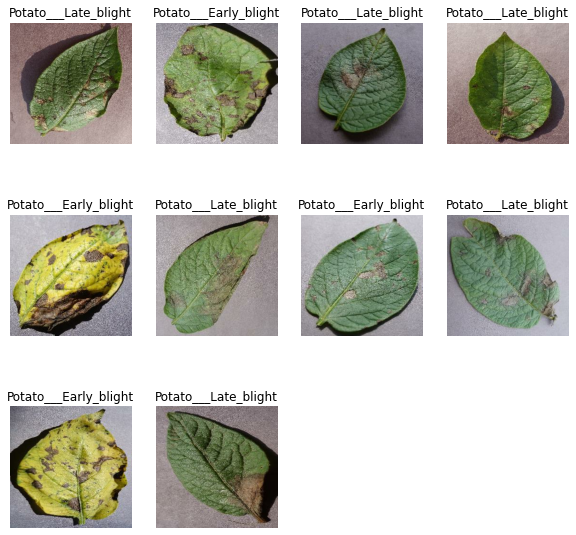

In [107]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_set.take(1):
    for i in range(10):
        plt.subplot(3,4,i+1)
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("int32"))

In [78]:
len(data_set)*0.8

54.400000000000006

In [79]:
train_ds=data_set.take(54)

In [82]:
test_ds=data_set.take(6)

In [83]:
val_ds=data_set.take(6)

In [108]:
def get_data_set_partitioning_tf(data_set,train_split=0.8,val_split=0.1,test_spli=0.1,shuffle=True,shuffle_size=10000):
    data_set_size=len(data_set)
    if shuffle:
        data_set=data_set.shuffle(shuffle_size,seed=12)
    
    train_size=int(len(data_set)*train_split)
    val_size=int(len(data_set)*val_split)

    train_dataset=data_set.take(train_size)
    val_data_set=data_set.skip(train_size).take(val_size)
    test_data_set=data_set.skip(train_size).skip(val_size)

    return train_dataset,val_data_set,test_data_set

In [109]:
train_dataset,val_data_set,test_data_set=get_data_set_partitioning_tf(data_set)

In [110]:
len(data_set)

68

In [111]:
len(train_dataset)

54

In [112]:
len(val_data_set)

6

In [113]:
len(test_data_set)

8

In [114]:
train_dataset=train_dataset.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=val_data_set.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset=test_data_set.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [117]:
resize_and_reshape=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [125]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    # layers.experimental.preprocessing.RandomRotation(0.1)
])

In [126]:
input_shape=(batch_size,Image_Size,Image_Size,channel)

model=models.Sequential([
    resize_and_reshape,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")
    
     ])
model.build(input_shape=input_shape)

## Understanding Sequential Vs Functional API in Keras

https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/

In [127]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

## Model.compile
https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [128]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
    
)

In [129]:
history=model.fit(train_dataset,epochs=Epoch,batch_size=batch_size,verbose=1,validation_data=val_data_set)

Epoch 1/30
54/54 [==============================] - 90s 2s/step - loss: 0.9061 - accuracy: 0.4664 - val_loss: 0.8612 - val_accuracy: 0.7188
Epoch 2/30
54/54 [==============================] - 88s 2s/step - loss: 0.6129 - accuracy: 0.7188 - val_loss: 0.5573 - val_accuracy: 0.7656
Epoch 3/30
54/54 [==============================] - 87s 2s/step - loss: 0.3836 - accuracy: 0.8351 - val_loss: 0.3597 - val_accuracy: 0.8512
Epoch 4/30
54/54 [==============================] - 83s 2s/step - loss: 0.3598 - accuracy: 0.8646 - val_loss: 0.7662 - val_accuracy: 0.8385
Epoch 5/30
54/54 [==============================] - 73s 1s/step - loss: 0.2527 - accuracy: 0.9126 - val_loss: 0.1367 - val_accuracy: 0.9479
Epoch 6/30
54/54 [==============================] - 73s 1s/step - loss: 0.1174 - accuracy: 0.9578 - val_loss: 0.0652 - val_accuracy: 0.9792
Epoch 7/30
54/54 [==============================] - 71s 1s/step - loss: 0.0900 - accuracy: 0.9670 - val_loss: 0.1945 - val_accuracy: 0.9479
Epoch 8/30
54/54 [==

In [130]:
score=model.evaluate(test_data_set)

8/8 [==============================] - 4s 293ms/step - loss: 0.1270 - accuracy: 0.9805


In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [136]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

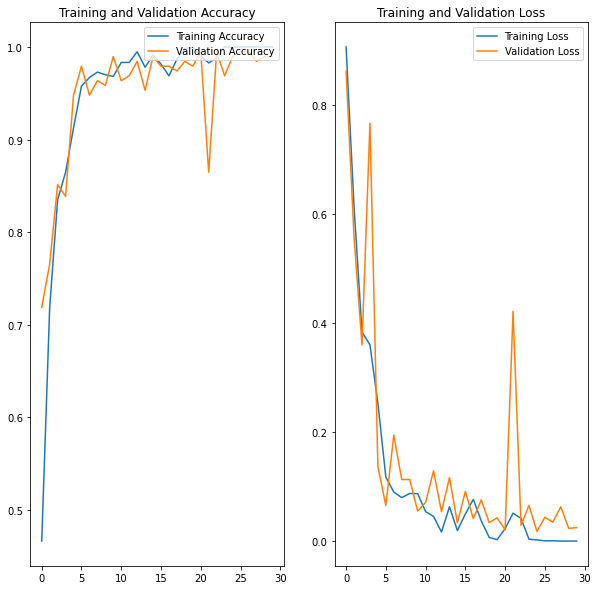

In [139]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(Epoch), acc, label='Training Accuracy')
plt.plot(range(Epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(Epoch), loss, label='Training Loss')
plt.plot(range(Epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 497ms/step
Potato___Late_blight


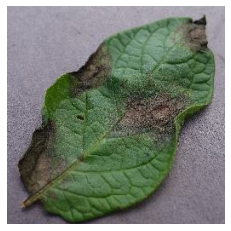

In [140]:
import numpy as np
for image_batch,label_batch in test_data_set.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    plt.axis("off")
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])
    # print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [143]:
model.save("./potatoes")

INFO:tensorflow:Assets written to: ./potatoes\assets


INFO:tensorflow:Assets written to: ./potatoes\assets
